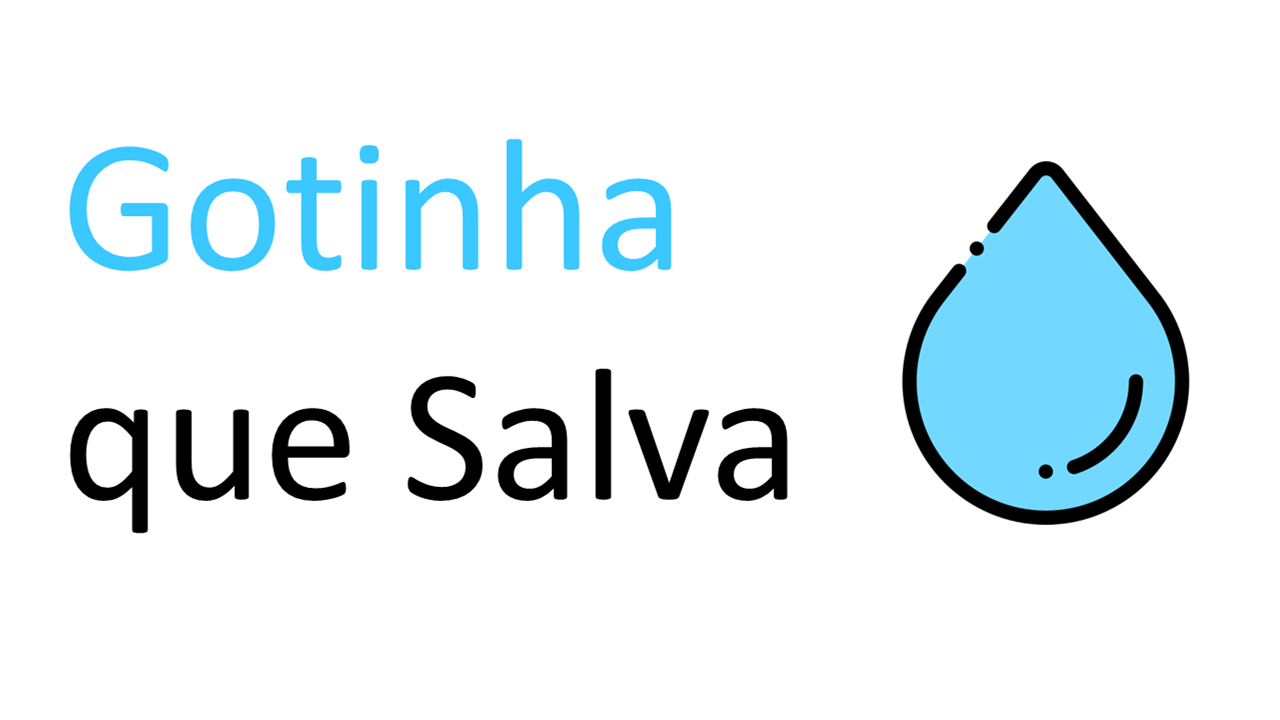

In [60]:
from IPython import display
display.Image("https://raw.githubusercontent.com/IgorQuaresma/GotinhaQueSalva/main/Data/Images/capa_projeto.png")

# Objetivo

Objetivou-se analisar os dados públicos do Programa Nacional de Imunizações referentes a vacinação da Poliomielite

# Introdução

## Poliomielite

A poliomielite consiste em uma doença **infecto-contagiosa aguda** causada pelo vírus Poliovírus. A transmissão do vírus causador da doença ocorre por diferentes vias, destacando-se  a forma direta oral-oral,  quando uma pessoa contaminada expele gotículas no ar, seja ao falar, tossir ou espirrar e acaba infectando um outro indivíduo, ou seja a forma indireta, quando uma determinada pessoa é infectado ao ter contato com água ou alimentos contaminados com fezes de indivíduos que tiveram o vírus em seu organismo.

A maior parte das infecções são caracterizadas por poucos sintomas, como febre, dor de garganta, náusea e vômitos. Porém, cerca de **1% dos infectados  pelo vírus pode desenvolver a forma paralítica da doença**, que pode causar sequelas permanentes, insuficiência respiratória e, em alguns casos, levar à morte. 

**A doença não possui um tratamento específico**. **A disseminação dessa pode ser evitada por meio da vacinação**, método mais eficiente, conjuntamente com a intensificação de medidas preventivas de higiene pessoal e  não aglomeração de pessoas.


fonte: https://www.bio.fiocruz.br/index.php/br/poliomielite-sintomas-transmissao-e-prevencao


## Tipos de Vacinas (VIP ou VOP?)

A fim de se proteger da doença, as seguintes vacinas podem ser utilizadas:


* **Vacina Oral Poliomielite (VOP)** - Famosa vacina das **gotinhas** (origem do Zé Gotinha hehe), essa possui o vírus atenuado em sua composição. Por ser feita com o **vírus atenuado**, existe uma pequena probabilidade (bem pequena mesmo)  do receptor da vacina desenvolver a doença  (vaccine associated paralytic poliomyelitis, VAPP).  



* **Vacina Inativada Poliomielite (VIP)** - aplicada de forma intramuscular, ou seja, por **injeção**. Por utilizar o **vírus inativado**, não existe chance de usuário desenvolver a doença ao tomar essa vacina. Por esse motivo, a Organização Mundial da Saúde (OMS) recomenda que países como o Brasil, de baixo risco para o desenvolvimento da doença, utilizem preferencialmente a vacina inativada (VIP). 



Desde 2016, o esquema vacinal contra a poliomielite funciona, na prática, da seguinte forma aqui no Brasil: três doses da vacina injetável (VIP), com vírus inativados, aos 2, 4 e 6 meses de idade, e mais duas doses de reforço com a vacina oral (VOP), com vírus atenuados, entre 15 e 18 meses e entre 4 e 5 anos de idade. 




OBS: Mas porque a VOP ainda é utilizada?
Primeiro, **ela é segura**, os casos de VAPP são raríssimos se comparados com o total de doses aplicadas, a ocorrência de Poliomielite causada pela vacina (VAPP) ocorre aproximadamente uma vez a cada 2.7 milhões de doses aplicadas.  Além disso, ela é **mais barata** e tem uma **aplicação simplificada** em relação a VIP, haja vista que a aplicação dessa é por via oral. Para locais que demandam uma vacinação em massa, esse tipo de vacina pode ajudar a otimizar as campanhas de vacinação.


Fontes utilizadas:
https://www.who.int/immunization/diseases/poliomyelitis/endgame_objective2/oral_polio_vaccine/VAPPandcVDPVFactSheet-Feb2015.pdf

http://scielo.iec.gov.br/pdf/rpas/v6n3/v6n3a01.pdf

https://saude.abril.com.br/blog/com-a-palavra/estamos-mesmo-livres-da-poliomielite/

## Histórico da doença no Brasil

No começo do século XX, a Poliomielite era uma das doenças mais temidas nos países industrializados, paralisando diversas crianças todos os anos.

Após introdução das vacinas nas décadas de 1950 e 1960 a incidência dos casos da doença foi controlada e praticamente eliminada nos países mais desenvolvidos. Contudo, nos países em desenvolvimento, a doença ainda estava atingindo elevados números de infectados.

Após uma força conjunta com o lançamento da Iniciativa Global de Erradicação da Pólio na 41ª Assembleia Mundial da Saúde no ano de 1988, conjuntamente com o apoio e investimentos de diversos países, instituições e voluntários, os casos caíram mais de 99% em todo o mundo.

No Brasil, o último caso de poliomielite ocorreu em 1989, na cidade de Sousa, na Paraíba. A vacinação em massa da população está por trás desse êxito. 

Leia mais em: https://saude.abril.com.br/blog/com-a-palavra/estamos-mesmo-livres-da-poliomielite/

## O hoje preocupa!

## Hipóteses 

1. A cobertura vacinal vem de fato regredindo nos últimos anos?
2. A pandemia de Covid-19 foi a principal responsável pela queda da cobertura vacinal no ano de 2020.
3. Capitais de médio e pequeno porte têm melhor desempenho em campanhas de vacinação (cobertura vacinal) do que as maiores metrópoles do país.




estados mais populossos cobertura vacinal
https://www.cnnbrasil.com.br/nacional/2021/01/18/ranking-mostra-capitais-e-grandes-cidades-com-melhor-desempenho-em-vacinacao


https://revistapesquisa.fapesp.br/as-razoes-da-queda-na-vacinacao/


http://bvsms.saude.gov.br/bvs/publicacoes/denominadores_calculo_coberturas_vacinais.pdf

### Importando todas as bibliotecas

In [61]:
#Download all the necessary libs 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [62]:
# Open the file and set the UF column as the index
df_cv = pd.read_csv('https://raw.githubusercontent.com/IgorQuaresma/GotinhaQueSalva/main/Data/csv/CoberturasVacinaisPorAnoPoliomielite_074_formatado.csv')
df_cv = df_cv.iloc[:,1:].set_index('UF')


### Hipótese 1 -  Cobertura vacinal vem de fato regredindo nos últimos anos?

 A fórmula de cálculo da cobertura vacinal (CV) é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100 (Notas Técnicas TABNET - http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf).
 
 CV = (número de doses aplicadas da dose indicada / população alvo )*100
 
 A população alvo, de forma geral, consiste no número de pessoas que devem tomar a vacina em uma determinada região. Os dados são coletados de diferentes fontes, seja o próprio censo demográfico do IBGE para caso de adultos ou a base do SINASC para a  população menor ou igual a 1 ano (maiores detalhes podem ser vistos nas notas técnicas).
 
 No caso da vacina da poliomielite, em que as campanhas de vacinação são voltadas para as crianças de até 5 anos, considera-se como número de doses aplicadas o somatório das 3ª doses da vacina oral e inativada e, como população alvo o número de crianças até 5 anos de cada uma das respectivas regiões.
  

In [63]:
df_cv_aberto = df_cv.drop('Regiao', axis=1).T
df_cv_aberto = df_cv_aberto.reset_index().melt(id_vars=['index'], value_vars=df_cv_aberto.columns)


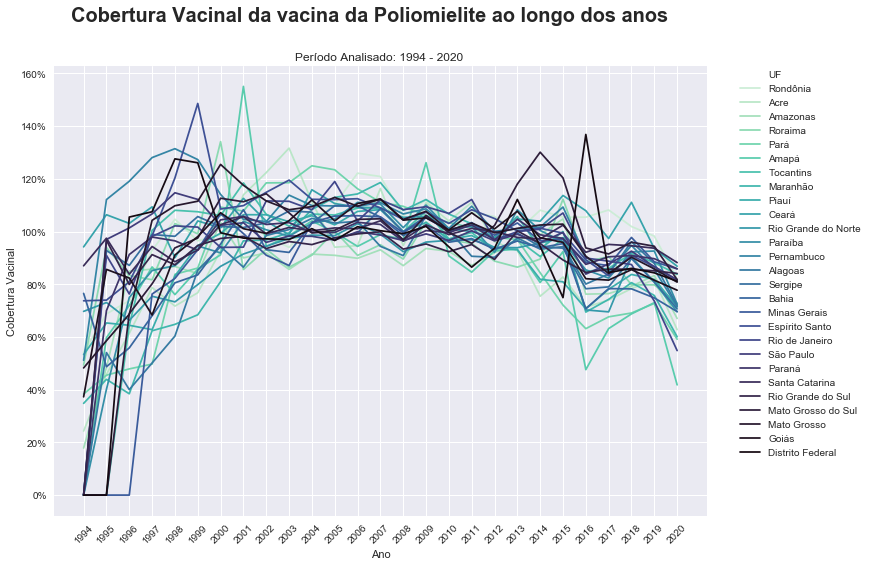

In [64]:
# Defining color pallete 
palette = sns.color_palette("mako_r", 27)
plt.style.use('seaborn')
fig, ax = plt.subplots()
sns.lineplot(data=df_cv_aberto.query("index != '2021'"), x='index', y='value', hue='UF', palette=palette)
fig.set_size_inches(11.7, 8.27)
plt.title("Período Analisado: 1994 - 2020 ")
plt.suptitle("Cobertura Vacinal da vacina da Poliomielite ao longo dos anos", size=20, weight='bold' )
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
ax.legend(loc=1, bbox_to_anchor=(1.25,1.01))
ax.set_xlabel('Ano')
ax.set_ylabel('Cobertura Vacinal')
plt.show()



A partir do gráfico, oberva-se que a cobertura vacinal assume valores maiores do que 100% em alguns períodos. As notas técnicas não apresentam um justificativa direta para isso, porém, na minha opinião, isso pode ser justificado pela própria equação que é utilizada para calcular a CV. A quantidade de doses aplicadas (numerador da equação) pode aumentar enquanto a população de uma determinada região permanece "mais ou menos" constante, ou seja, sem sofrer uma grande alteração. Um exemplo disso é uma criança que mora no estado de Goiás, porém toma a vacina no Distrito Federal. Nesse caso, como essa criança não mora no Distrito Federal, ela não é contabilizada na população desse estado, porém, ela entra para o cálculo de doses aplicadas.

Desconsiderou-se os dados de 2021, haja vista que esse ano ainda está em andamento no momento do desenvolvimento dessa análse,e, portanto, os dados apresentados são preliminares.

Ao analisar o gráfico, **verifica-se que de fato a cobertura vacinal vem apresentando uma tendência de queda nos últimos anos, o que confirma a primeira hipótese do projeto.**


### Hipótese 2 - A pandemia de Covid-19 ocasionou uma maior queda da cobertura vacinal no ano de 2020.



No item anterior foi verificado que a cobertura vacinal vem regredindo nos últimos anos. Com o objetivo de verificar a hipótese 2, deve-se analisar se a queda da CV no ano de 2020 foi de fato mais representativa do que nos anos anteriores.

Como o objetivo é verificar quão grande foi a diferen

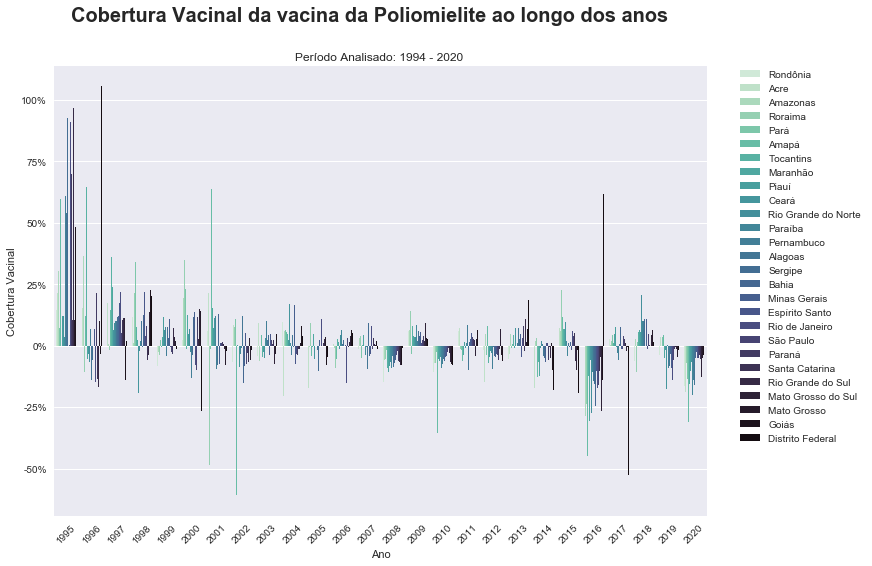

In [68]:
df_cv_aberto = df_cv_aberto.query("index != '2021'")

df_cv_aberto['diff'] = df_cv_aberto.query("index != '2021'")['value'].diff()
df_cv_aberto

# Defining color pallete 
palette = sns.color_palette("mako_r", 27)
plt.style.use('seaborn')
fig, ax = plt.subplots()
sns.barplot(data=df_cv_aberto.query("index != '1994'"), x='index', y='diff', hue='UF', palette=palette)
fig.set_size_inches(11.7, 8.27)
plt.title("Período Analisado: 1994 - 2020 ")
plt.suptitle("Cobertura Vacinal da vacina da Poliomielite ao longo dos anos", size=20, weight='bold' )
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
ax.legend(loc=1, bbox_to_anchor=(1.25,1.01))
ax.set_xlabel('Ano')
ax.set_ylabel('Cobertura Vacinal')
plt.show()

,index,UF,value,diff
0,1994,Rondônia,54.17,NaN
1,1995,Rondônia,68.75,14.58
2,1996,Rondônia,73.78,5.03
3,1997,Rondônia,92.83,19.05
4,1998,Rondônia,104.67,11.84


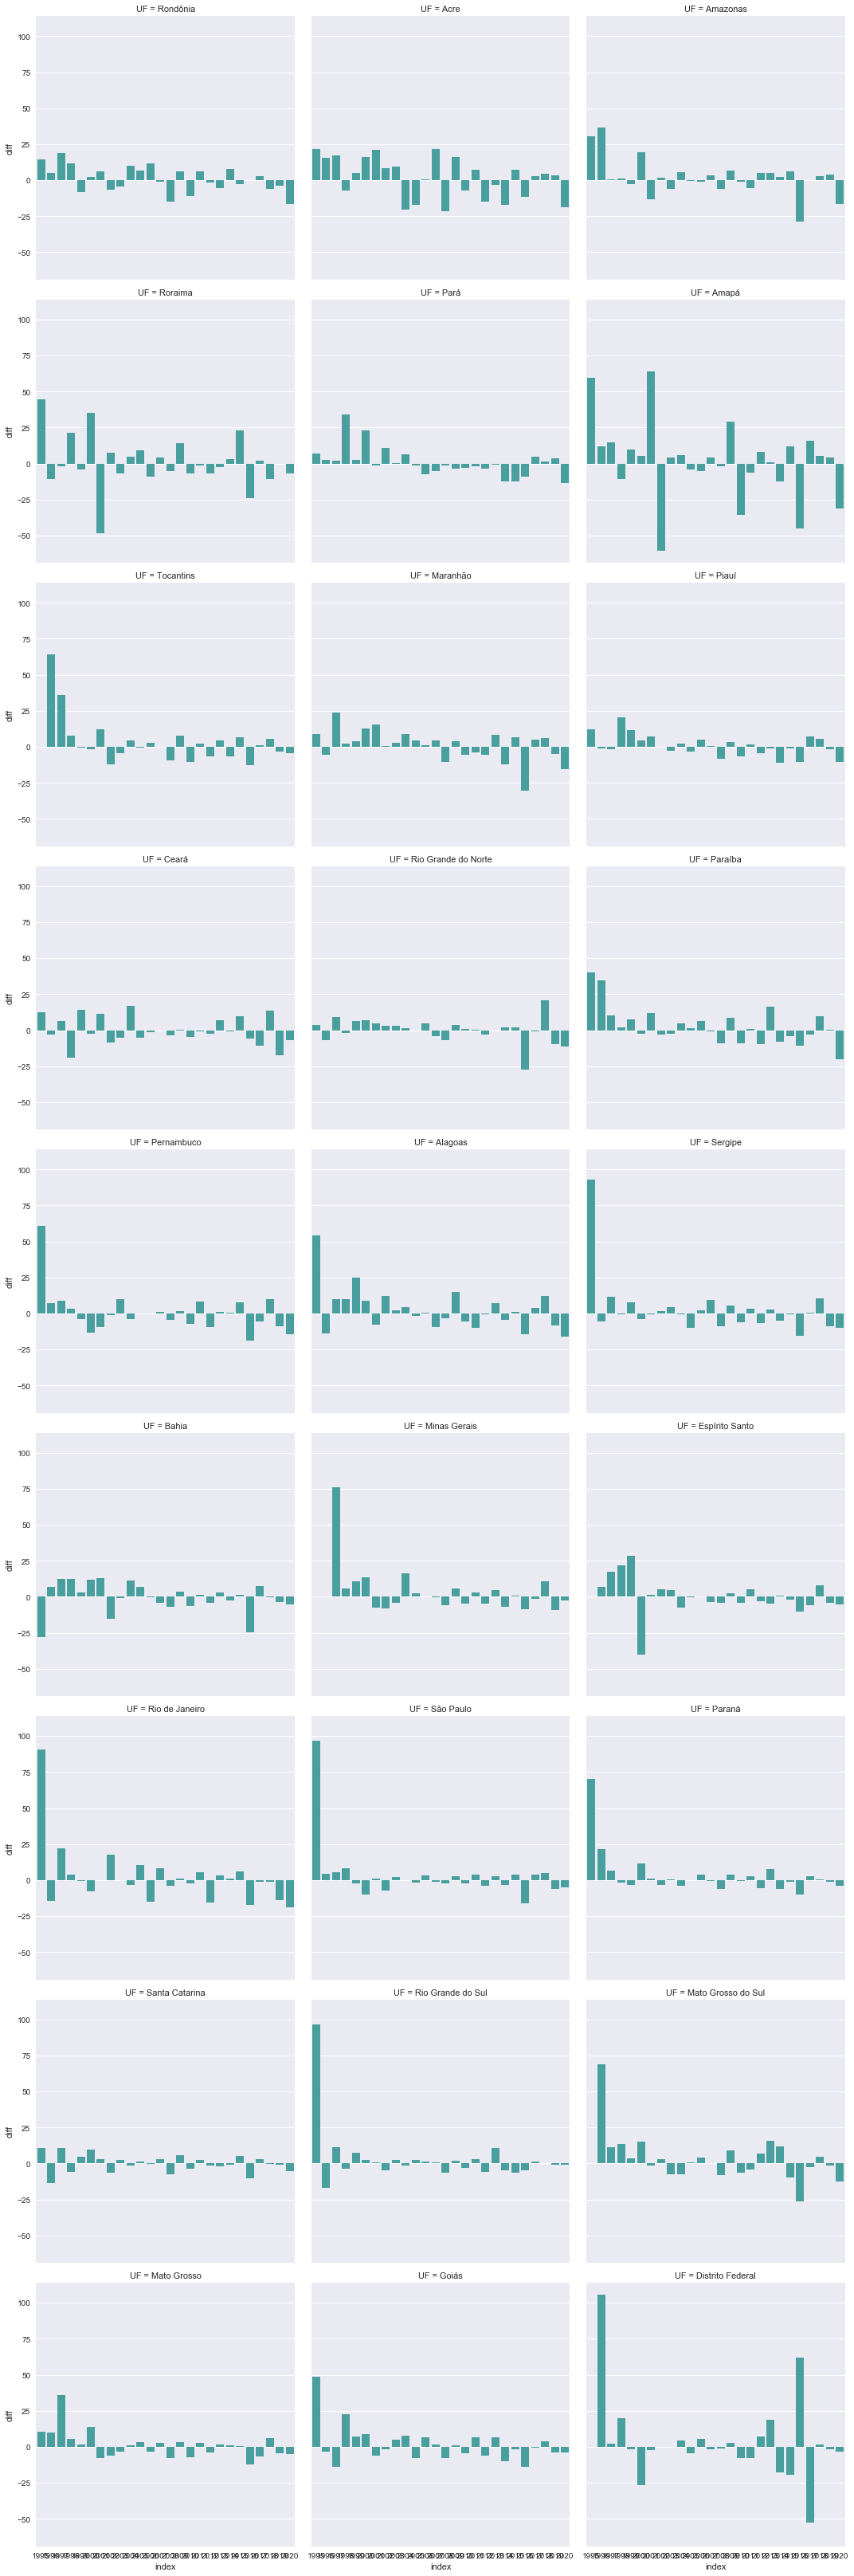

In [112]:
g = sns.catplot(data=df_cv_aberto.query("index != '1994'"), x='index', 
                 y='diff', kind='bar', col='UF', color=(0.22673713, 0.67906542, 0.67620044), col_wrap=3)

plt.show()